## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#INLINE COMMAND
#AUTOLOAD
import decimal
from decimal import Decimal



import os

import glob

from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers


from tensorflow.keras.preprocessing.sequence import pad_sequences


from tensorflow.keras.metrics import categorical_crossentropy, Recall

from tensorflow.keras.layers import Normalization, Dense, SimpleRNN, Flatten, LSTM, GRU, Masking

import random
import time

from tensorflow.keras import metrics
from scipy import signal, fftpack

2023-02-07 17:12:38.002164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-07 17:12:38.743364: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-07 17:12:38.743420: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-07 17:12:38.867201: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-07 17:12:40.814066: W tensorflow/stream_executor/platform/de

# Logistic Map

## Tests

In [8]:
# def logistic_seq(r: float, x0: float, n:int) -> np.ndarray:
#     """
#     ABCD
#     """
#     logistic_array = np.array([Decimal(x0)])
#     #logistic_array = [x0]
#     x_tmp = Decimal(x0)
#     for j in range(n-1):
        
#         x_tmp = Decimal(r )* Decimal(x_tmp)*(Decimal('1')-Decimal(x_tmp))
#        #  logistic_array.append(x_tmp)
# #         print(x_tmp)
#         logistic_array = np.append(logistic_array, x_tmp)
# #         print(logistic_array)
#     return logistic_array

In [4]:
def logistic_seq(r: float=4, x0: float=0.6, n:int=25) -> np.ndarray:
    """
    ABCD
    """
    logistic_array = np.array([x0])
    #logistic_array = [x0]
    x_tmp = x0
    for j in range(n-1):
        
        x_tmp = r* x_tmp*(1-x_tmp)
       #  logistic_array.append(x_tmp)
#         print(x_tmp)
        logistic_array = np.append(logistic_array, x_tmp)
#         print(logistic_array)
    return logistic_array

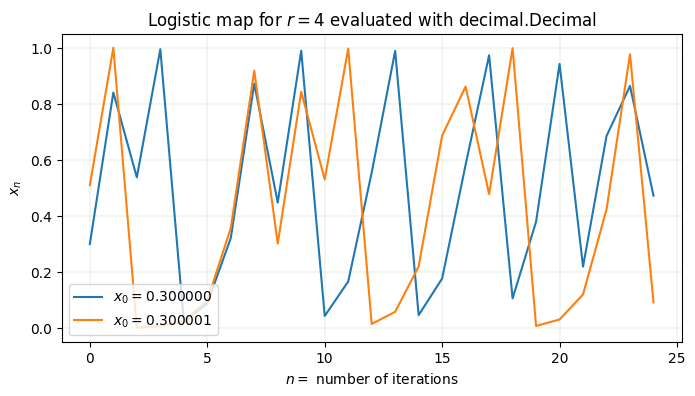

In [51]:
r = 4
sequence_log1 = logistic_seq(r, 0.3, 25)
sequence_log2 = logistic_seq(r, 0.51, 25)

plt.subplots(figsize=(8,4))
plt.plot(sequence_log1, label = "$x_0 = 0.300000$")
plt.plot(sequence_log2, label = "$x_0 = 0.300001$")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.125)
plt.xlabel("$n=$ number of iterations")
plt.ylabel("$x_n$")
plt.legend(loc=3)
plt.title(f"Logistic map for $r = {r}$ evaluated with decimal.Decimal")
plt.savefig('logistic_plot.png', bbox_inches='tight')
plt.show()

In [39]:
sequence_log1.shape

(25,)

In [40]:
np.std(sequence_log1)

0.21540659228538017

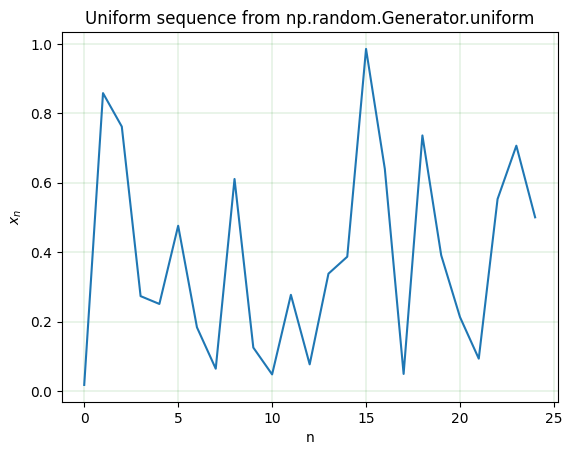

In [31]:
sequence = np.random.default_rng().uniform(0,1,25)

plt.plot(sequence)
plt.grid(color = 'green', linestyle = '-', linewidth = 0.125)
plt.xlabel("n")

plt.ylabel("$x_n$")
plt.title("Uniform sequence from np.random.Generator.uniform")
plt.savefig('uniform_plot.png', bbox_inches='tight')
plt.show()

In [54]:
np.unique((np.sort(sequence_log1)),return_counts=True)

(array([0.02249224, 0.04342185, 0.04639054, 0.08794536, 0.10609667,
        0.16614558, 0.17695382, 0.21930545, 0.3       , 0.32084391,
        0.37936067, 0.44761695, 0.47195556, 0.5376    , 0.55416492,
        0.58256466, 0.68484228, 0.84      , 0.86333333, 0.87161238,
        0.94178461, 0.97273231, 0.98826465, 0.98902407, 0.99434496]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1]))

In [6]:
# test1 = np.sort(sequence_log1)
# test2 = np.sort(sequence)
# new_seq_log = list()
# for jj in range(sequence_log1.shape[0]):
#     elem = test2[np.where(test1==sequence_log1[jj])[0][0]]
#     new_seq_log.append(elem)
# new_seq_log

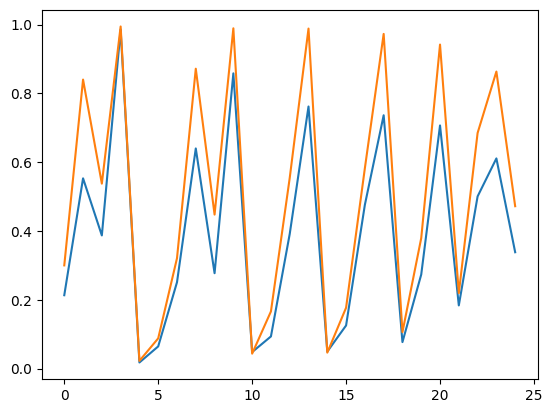

In [63]:
plt.plot(new_seq_log)
#plt.plot(sequence)
plt.plot(sequence_log1)

## List of Sequences

In [144]:
def logistic_seq(r: float=4, x0: float=0.6, n:int=25) -> np.ndarray:
    """
    ABCD
    """
    logistic_array = np.array([x0])
    #logistic_array = [x0]
    x_tmp = x0
    for j in range(n-1):
        
        x_tmp = r* x_tmp*(1-x_tmp)
       #  logistic_array.append(x_tmp)
#         print(x_tmp)
        logistic_array = np.append(logistic_array, x_tmp)
#         print(logistic_array)
    return logistic_array

In [145]:
# [np.random.normal(loc=0.0, scale=0.05, size=50) for j in range(3)]

In [215]:
def log_seq_gen(r:float=4, num:int=10**3, length:int=25, noise:float=0) -> np.ndarray:
    """
    ABCD
    """
    init_values = np.random.default_rng().uniform(0,1, num)
 #   gw_noise = np.random.normal(loc=0.0, scale=0.05, size=50)
#    log_seq_list = list()
#     for j in range(num):
#         tmp_seq = logistic_seq(r = 4, x0 = init_values[j], n = length)
#         log_seq_list.append(tmp_seq)
    #Use for loop for readability!!!
    
    gw_noise = np.random.default_rng().normal(loc=0.0, scale=noise, size=(num,length))
    unif_noise = np.random.default_rng().uniform(-noise, noise,size=(num,length))

    log_seq_list = [logistic_seq(r=r, x0 = init_values[j], n = length)  for j in range(num)]
    
    #log_seq_noise_array = np.array(log_seq_list) + gw_noise
    log_seq_noise_array = np.array(log_seq_list) + unif_noise

    return log_seq_noise_array

In [178]:
# log_seq_gen(4,100)

In [179]:
# plt.plot(np.transpose(_));

In [216]:
def unif_seq_gen(num:int=10**3, length:int=25) -> np.ndarray:
    """
    Generate uniformly distributed sequences
    """
    unif_seq_arrays = np.random.default_rng().uniform(0,1, (num, length))
    
    return unif_seq_arrays

In [217]:
# unif_seq_gen(4,25)

In [218]:
def uniformize(seq:np.ndarray)->np.ndarray:
    """
    ABCD
    """
    tmp1 = np.sort(seq)
    tmp2 = np.random.default_rng().uniform(0,1, seq.shape[0])
    tmp2 = np.sort(tmp2)
#     new_seq_log = list()
#     for jj in range(sequence_log1.shape[0]):
#         elem = test2[np.where(test1==sequence_log1[jj])[0][0]]
#         new_seq_log.append(elem)
    new_seq = [tmp2[np.where(tmp1==seq[jj])[0][0]] for jj in range(seq.shape[0])]
    new_seq = np.array(new_seq)
    
    return new_seq

In [219]:
log_seq_arrays = log_seq_gen(r=4, num=10**3, length=50, noise=0.02)
#log_seq_unif_arrays = log_seq_arrays.map(uniformize_log)

log_seq_unif_arrays = np.array(list(map(uniformize, log_seq_arrays)))

unif_seq_arrays = unif_seq_gen(10**3,50)

X = np.concatenate((log_seq_unif_arrays, unif_seq_arrays), axis=0)

#X = np.concatenate((log_seq_arrays, unif_seq_arrays), axis=0)  #Without normalization
  
#X = np.concatenate((log_seq_unif_arrays, np.array(list(map(uniformize, log_seq_gen(r=3.8, num=10**3, length=50))))), axis=0)


X = np.expand_dims(X, axis=-1)
y = np.concatenate((np.ones((10**3), dtype=int), np.zeros((10**3), dtype=int)))

X.shape, y.shape

In [225]:
# def bin_optimal(seq: np.ndarray)->int:
#     """
#     ABCD
#     """
#     q25, q75 = np.percentile(seq, [25, 75])
#     bin_width = 2 * (q75 - q25) * len(seq) ** (-1/3)
#     bins = round((seq.max() - seq.min()) / bin_width)
    
#     return bins

In [226]:
# bin_optimal(X[45])

In [227]:
# x = log_seq_arrays[-1]
# q25, q75 = np.percentile(x, [25, 75])
# bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
# bins = round((x.max() - x.min()) / bin_width)
# print("Freedman–Diaconis number of bins:", bins)
# plt.hist(x, bins=bins);

In [228]:
# plt.hist(X[45], density=True, bins=4);

In [229]:
# plt.hist(log_seq_unif_arrays[-1], density=False, bins=30);

In [230]:
# plt.hist(unif_seq_gen(4,10**3)[-1], density=False,bins=30);

**Training and Test**

In [231]:
# def unison_shuffled_copies(a, b):
#     assert len(a) == len(b)
#     p = np.random.permutation(len(a))
#     return a[p], b[p]

In [232]:
# X, y = unison_shuffled_copies(X, y)

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=256)
X_train.shape, y_train.shape

**Function to plot the history**

In [236]:
def plot_history(history):
    """
    Plot the loss and accuracy of the train and val sets
    """
    
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: Binary_Crossentropy --- 
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Binary Crossentropy')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- METRICS:Accuracy ---
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
                        
    return ax

## Simple RNN model

In [242]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

#Stacked layers
model.add(layers.SimpleRNN(10, return_sequences=False, input_shape=((50,1))))
#model.add(layers.SimpleRNN(3, return_sequences=False))

#Output layer
model.add(Dense(1, activation='sigmoid'))

model.summary()


# model = Sequential()
# model.add(layers.SimpleRNN(units=10, activation='tanh', input_shape=(50,1)))
# model.add(layers.Dense(1, activation="sigmoid"))
# model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [243]:
%%time

# The compilation
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics='accuracy') # Recommended optimizer for RNNs

# The fit
# history = model.fit(X_train, y_train,batch_size=16,epochs=10, verbose=1, validation_split=0.2, scoring=)
es=EarlyStopping(patience=30, restore_best_weights=True, monitor='accuracy')
history=model.fit(X_train, y_train, batch_size=32, epochs=512, validation_split=0.2, callbacks = [es], verbose=1)

Epoch 1/256
35/35 [==============================] - 2s 20ms/step - loss: 0.7014 - accuracy: 0.4946 - val_loss: 0.7067 - val_accuracy: 0.4679
Epoch 2/256
35/35 [==============================] - 0s 12ms/step - loss: 0.6955 - accuracy: 0.5045 - val_loss: 0.7022 - val_accuracy: 0.4571
Epoch 3/256
35/35 [==============================] - 0s 11ms/step - loss: 0.6942 - accuracy: 0.5107 - val_loss: 0.6991 - val_accuracy: 0.4893
Epoch 4/256
35/35 [==============================] - 0s 13ms/step - loss: 0.6913 - accuracy: 0.5321 - val_loss: 0.6945 - val_accuracy: 0.4964
Epoch 5/256
35/35 [==============================] - 0s 12ms/step - loss: 0.6886 - accuracy: 0.5250 - val_loss: 0.6896 - val_accuracy: 0.5179
Epoch 6/256
35/35 [==============================] - 0s 12ms/step - loss: 0.6841 - accuracy: 0.5527 - val_loss: 0.6876 - val_accuracy: 0.5250
Epoch 7/256
35/35 [==============================] - 0s 12ms/step - loss: 0.6832 - accuracy: 0.5562 - val_loss: 0.6758 - val_accuracy: 0.5750
Epoch 

35/35 [==============================] - 0s 12ms/step - loss: 0.5627 - accuracy: 0.7286 - val_loss: 0.6027 - val_accuracy: 0.7214
Epoch 59/256
35/35 [==============================] - 0s 11ms/step - loss: 0.5668 - accuracy: 0.7223 - val_loss: 0.5993 - val_accuracy: 0.7143
Epoch 60/256
35/35 [==============================] - 0s 13ms/step - loss: 0.5585 - accuracy: 0.7205 - val_loss: 0.5956 - val_accuracy: 0.7214
Epoch 61/256
35/35 [==============================] - 0s 12ms/step - loss: 0.5593 - accuracy: 0.7241 - val_loss: 0.6008 - val_accuracy: 0.7036
Epoch 62/256
35/35 [==============================] - 1s 14ms/step - loss: 0.5632 - accuracy: 0.7152 - val_loss: 0.5940 - val_accuracy: 0.7250
Epoch 63/256
35/35 [==============================] - 0s 13ms/step - loss: 0.5599 - accuracy: 0.7250 - val_loss: 0.5962 - val_accuracy: 0.7286
Epoch 64/256
35/35 [==============================] - 0s 11ms/step - loss: 0.5616 - accuracy: 0.7286 - val_loss: 0.5976 - val_accuracy: 0.7143
Epoch 65/256

35/35 [==============================] - 0s 12ms/step - loss: 0.5341 - accuracy: 0.7295 - val_loss: 0.5885 - val_accuracy: 0.7429
Epoch 116/256
35/35 [==============================] - 0s 11ms/step - loss: 0.5287 - accuracy: 0.7411 - val_loss: 0.5790 - val_accuracy: 0.7643
Epoch 117/256
35/35 [==============================] - 0s 12ms/step - loss: 0.5237 - accuracy: 0.7500 - val_loss: 0.6155 - val_accuracy: 0.7000
Epoch 118/256
35/35 [==============================] - 0s 11ms/step - loss: 0.5270 - accuracy: 0.7536 - val_loss: 0.5909 - val_accuracy: 0.7286
Epoch 119/256
35/35 [==============================] - 0s 11ms/step - loss: 0.5474 - accuracy: 0.7223 - val_loss: 0.5805 - val_accuracy: 0.7464
Epoch 120/256
35/35 [==============================] - 0s 12ms/step - loss: 0.5270 - accuracy: 0.7473 - val_loss: 0.5812 - val_accuracy: 0.7571
Epoch 121/256
35/35 [==============================] - 0s 12ms/step - loss: 0.5331 - accuracy: 0.7366 - val_loss: 0.5925 - val_accuracy: 0.7286
Epoch 

Epoch 172/256
35/35 [==============================] - 0s 12ms/step - loss: 0.5270 - accuracy: 0.7527 - val_loss: 0.5727 - val_accuracy: 0.7429
Epoch 173/256
35/35 [==============================] - 0s 11ms/step - loss: 0.5150 - accuracy: 0.7509 - val_loss: 0.5666 - val_accuracy: 0.7464
Epoch 174/256
35/35 [==============================] - 0s 12ms/step - loss: 0.5158 - accuracy: 0.7464 - val_loss: 0.5695 - val_accuracy: 0.7357
Epoch 175/256
35/35 [==============================] - 0s 11ms/step - loss: 0.5259 - accuracy: 0.7527 - val_loss: 0.5776 - val_accuracy: 0.7429
Epoch 176/256
35/35 [==============================] - 0s 12ms/step - loss: 0.5352 - accuracy: 0.7366 - val_loss: 0.5799 - val_accuracy: 0.7250
Epoch 177/256
35/35 [==============================] - 1s 16ms/step - loss: 0.5192 - accuracy: 0.7589 - val_loss: 0.5795 - val_accuracy: 0.7250
Epoch 178/256
35/35 [==============================] - 0s 14ms/step - loss: 0.5231 - accuracy: 0.7518 - val_loss: 0.5813 - val_accuracy:

Epoch 229/256
35/35 [==============================] - 0s 13ms/step - loss: 0.5167 - accuracy: 0.7563 - val_loss: 0.5382 - val_accuracy: 0.7679
Epoch 230/256
35/35 [==============================] - 1s 19ms/step - loss: 0.5037 - accuracy: 0.7607 - val_loss: 0.5646 - val_accuracy: 0.7607
Epoch 231/256
35/35 [==============================] - 0s 12ms/step - loss: 0.5026 - accuracy: 0.7661 - val_loss: 0.5616 - val_accuracy: 0.7464
Epoch 232/256
35/35 [==============================] - 0s 11ms/step - loss: 0.5020 - accuracy: 0.7688 - val_loss: 0.5478 - val_accuracy: 0.7714
Epoch 233/256
35/35 [==============================] - 0s 11ms/step - loss: 0.5271 - accuracy: 0.7536 - val_loss: 0.5817 - val_accuracy: 0.7321
Epoch 234/256
35/35 [==============================] - 0s 12ms/step - loss: 0.5460 - accuracy: 0.7464 - val_loss: 0.5638 - val_accuracy: 0.7500
Epoch 235/256
35/35 [==============================] - 0s 11ms/step - loss: 0.5136 - accuracy: 0.7616 - val_loss: 0.5922 - val_accuracy:

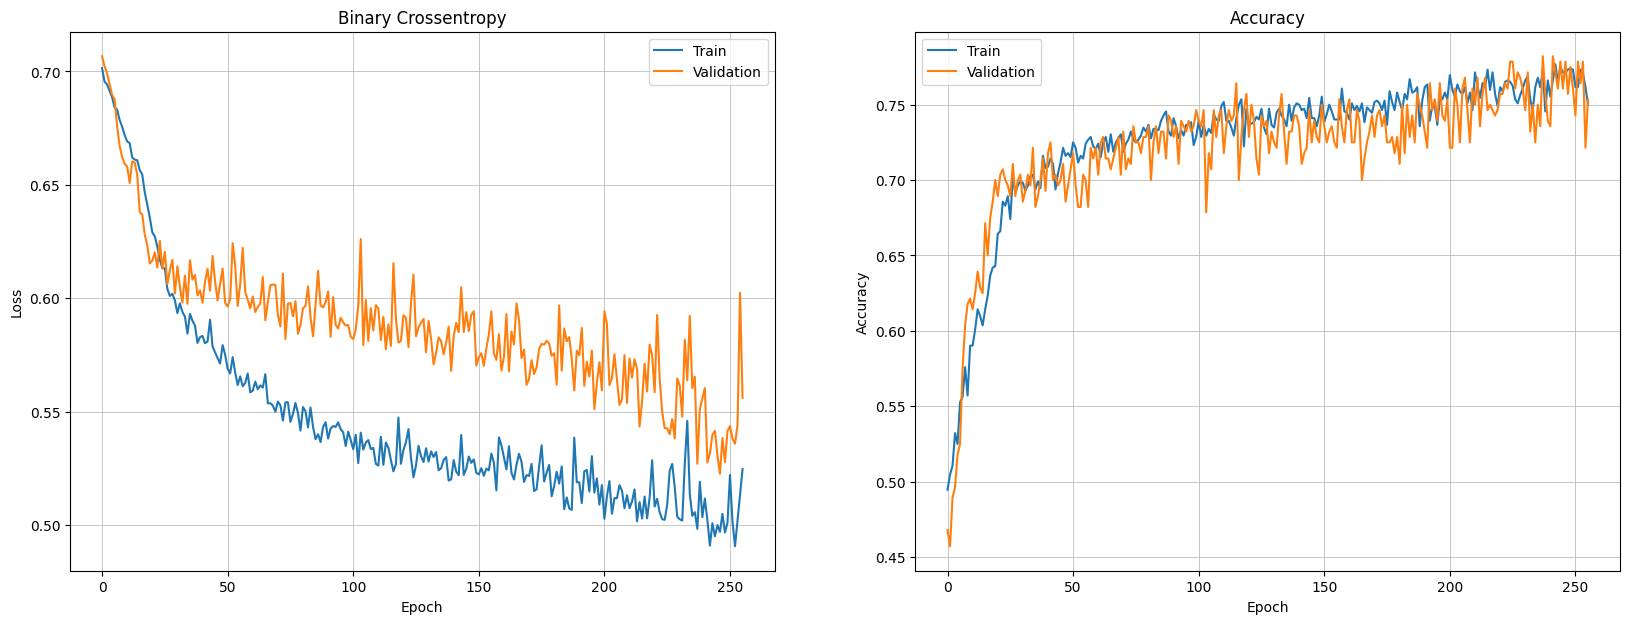

In [244]:
plot_history(history);

In [245]:
es.best_epoch

242

In [205]:
es.best

0.9491071701049805

In [206]:
# The classification
result = model.evaluate(X_test, y_test)
result

19/19 [==============================] - 0s 9ms/step - loss: 0.2311 - accuracy: 0.9133


[0.2311122864484787, 0.9133333563804626]

In [173]:
#!mkdir -p saved_models
model.save('saved_models/RNN_Stacked_Noise_0.02_50_0.973')

INFO:tensorflow:Assets written to: saved_models/RNN_Stacked_Noise_0.02_50_0.973/assets


## LSTM Model

In [240]:
def create_model(): #Without compiling and X_train arguments
    """Add dropout layers?"""
    
#     model = models.Sequential()
    
#     #Masking layer
# #    model.add(layers.Masking(mask_value=-10, input_shape=(X_train.shape[1], 1)))
    
#     #Normalization
#   #  normalizer = Normalization()  #Omit as already in the [-1,1] range
#    # normalizer.adapt(X_train)
    
#     #LSTM layer
    
#     model.add(layers.LSTM(units=10, activation='tanh',
#                           recurrent_dropout=0.2, dropout=0.5, input_shape=((50,1))))
# #    model.add(layers.LSTM(units=20, activation='tanh', return_sequences=False, 
#  #                         recurrent_dropout=0.2, dropout=0.5))
#  #   model.add(layers.SimpleRNN(units=2, activation='tanh'))

#     #Dense layers
#     reg_l2 = regularizers.L2(0.5)
# #    model.add(layers.Dense(16, activation="relu", kernel_regularizer = reg_l2))
#  #   model.add(layers.Dropout(rate=0.5))
#   #  model.add(layers.Dense(8, activation="relu", kernel_regularizer = reg_l2))
#    # model.add(layers.Dropout(rate=0.5))
#     #model.add(layers.Dense(5, activation = 'relu'))
#     #model.add(layers.Dense(3, activation='relu'))
    
#     #Output layer
#     model.add(layers.Dense(1, activation='sigmoid'))

    model = Sequential()

    #Stacked layers
    model.add(layers.LSTM(10, input_shape=((50,1))))
#    model.add(layers.LSTM(3, return_sequences=False))

    #Output layer
    model.add(Dense(1, activation='sigmoid'))


    return model



model = create_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10)                480       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


Epoch 1/128
35/35 [==============================] - 4s 37ms/step - loss: 0.6962 - accuracy: 0.5045 - val_loss: 0.6959 - val_accuracy: 0.4857
Epoch 2/128
35/35 [==============================] - 1s 18ms/step - loss: 0.6938 - accuracy: 0.5071 - val_loss: 0.6945 - val_accuracy: 0.4821
Epoch 3/128
35/35 [==============================] - 1s 18ms/step - loss: 0.6934 - accuracy: 0.5063 - val_loss: 0.6940 - val_accuracy: 0.4964
Epoch 4/128
35/35 [==============================] - 1s 17ms/step - loss: 0.6933 - accuracy: 0.4839 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 5/128
35/35 [==============================] - 1s 17ms/step - loss: 0.6932 - accuracy: 0.4839 - val_loss: 0.6941 - val_accuracy: 0.4893
Epoch 6/128
35/35 [==============================] - 1s 18ms/step - loss: 0.6934 - accuracy: 0.5045 - val_loss: 0.6939 - val_accuracy: 0.4929
Epoch 7/128
35/35 [==============================] - 1s 18ms/step - loss: 0.6933 - accuracy: 0.4955 - val_loss: 0.6937 - val_accuracy: 0.5036
Epoch 

35/35 [==============================] - 1s 19ms/step - loss: 0.6902 - accuracy: 0.5330 - val_loss: 0.6967 - val_accuracy: 0.5036
Epoch 59/128
35/35 [==============================] - 1s 17ms/step - loss: 0.6914 - accuracy: 0.5161 - val_loss: 0.6941 - val_accuracy: 0.5071
Epoch 60/128
35/35 [==============================] - 1s 19ms/step - loss: 0.6905 - accuracy: 0.5250 - val_loss: 0.6920 - val_accuracy: 0.5107
Epoch 61/128
35/35 [==============================] - 1s 19ms/step - loss: 0.6895 - accuracy: 0.5312 - val_loss: 0.6916 - val_accuracy: 0.5464
Epoch 62/128
35/35 [==============================] - 1s 18ms/step - loss: 0.6856 - accuracy: 0.5580 - val_loss: 0.6901 - val_accuracy: 0.5393
Epoch 63/128
35/35 [==============================] - 1s 17ms/step - loss: 0.6829 - accuracy: 0.5750 - val_loss: 0.6985 - val_accuracy: 0.4964
Epoch 64/128
35/35 [==============================] - 1s 16ms/step - loss: 0.6806 - accuracy: 0.5661 - val_loss: 0.6869 - val_accuracy: 0.5393
Epoch 65/128

35/35 [==============================] - 1s 18ms/step - loss: 0.6600 - accuracy: 0.6116 - val_loss: 0.6642 - val_accuracy: 0.5964
Epoch 116/128
35/35 [==============================] - 1s 19ms/step - loss: 0.6568 - accuracy: 0.6089 - val_loss: 0.6790 - val_accuracy: 0.5750
Epoch 117/128
35/35 [==============================] - 1s 18ms/step - loss: 0.6630 - accuracy: 0.6116 - val_loss: 0.6741 - val_accuracy: 0.5893
Epoch 118/128
35/35 [==============================] - 1s 19ms/step - loss: 0.6555 - accuracy: 0.6089 - val_loss: 0.6680 - val_accuracy: 0.6107
Epoch 119/128
35/35 [==============================] - 1s 18ms/step - loss: 0.6586 - accuracy: 0.6143 - val_loss: 0.6815 - val_accuracy: 0.5750
Epoch 120/128
35/35 [==============================] - 1s 18ms/step - loss: 0.6557 - accuracy: 0.6134 - val_loss: 0.6663 - val_accuracy: 0.5893
Epoch 121/128
35/35 [==============================] - 1s 17ms/step - loss: 0.6569 - accuracy: 0.6125 - val_loss: 0.6607 - val_accuracy: 0.6250
Epoch 

array([<AxesSubplot: title={'center': 'Binary Crossentropy'}, xlabel='Epoch', ylabel='Loss'>,
       <AxesSubplot: title={'center': 'Accuracy'}, xlabel='Epoch', ylabel='Accuracy'>],
      dtype=object)

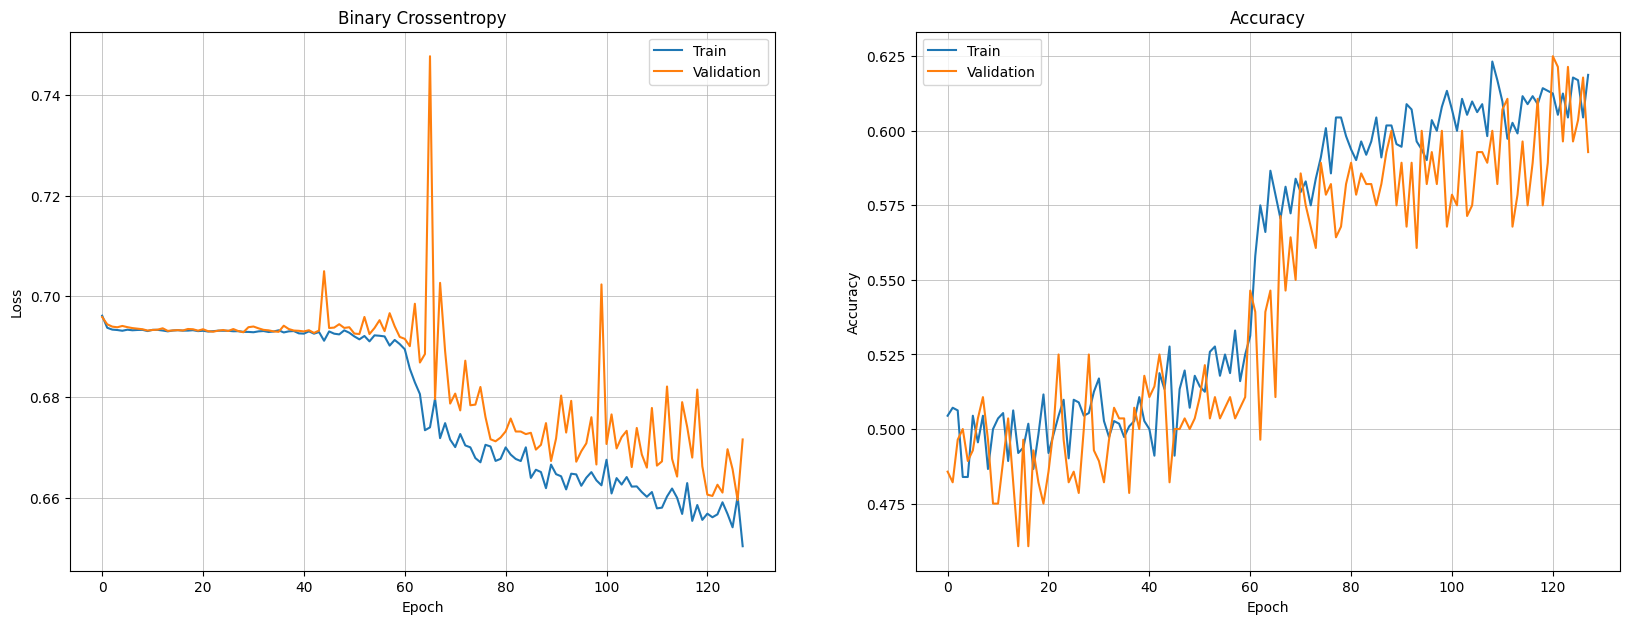

In [241]:
%%time

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics='accuracy') # Recommended optimizer for RNNs


es=EarlyStopping(patience=30, restore_best_weights=True, monitor='accuracy')

history=model.fit(X_train, y_train, batch_size=32, epochs=256, validation_split=0.2, callbacks = [es], verbose=1)
plot_history(history);

In [166]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 8ms/step - loss: 0.1028 - accuracy: 0.9733


[0.10283717513084412, 0.9733333587646484]

## GRU Model

In [237]:
### GRU ###
model = Sequential()
# model.add(layers.GRU(10, return_sequences= True, input_shape=((50,1))))
# model.add(layers.GRU(3, return_sequences=False))

model.add(layers.GRU(10,  input_shape=((50,1))))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 10)                390       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [238]:
%%time


# The compilation
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics='accuracy') # Recommended optimizer for RNNs

# The fit
es=EarlyStopping(patience=30, restore_best_weights=True, monitor='accuracy')
history=model.fit(X_train, y_train, batch_size=32, epochs=256, validation_split=0.2, callbacks = [es], verbose=1)

Epoch 1/256
35/35 [==============================] - 3s 31ms/step - loss: 0.6936 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.4857
Epoch 2/256
35/35 [==============================] - 1s 17ms/step - loss: 0.6934 - accuracy: 0.4946 - val_loss: 0.6932 - val_accuracy: 0.4857
Epoch 3/256
35/35 [==============================] - 1s 16ms/step - loss: 0.6934 - accuracy: 0.4991 - val_loss: 0.6933 - val_accuracy: 0.4857
Epoch 4/256
35/35 [==============================] - 1s 17ms/step - loss: 0.6934 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.4857
Epoch 5/256
35/35 [==============================] - 1s 16ms/step - loss: 0.6934 - accuracy: 0.4866 - val_loss: 0.6932 - val_accuracy: 0.4893
Epoch 6/256
35/35 [==============================] - 1s 16ms/step - loss: 0.6934 - accuracy: 0.5054 - val_loss: 0.6932 - val_accuracy: 0.4857
Epoch 7/256
35/35 [==============================] - 1s 17ms/step - loss: 0.6934 - accuracy: 0.4804 - val_loss: 0.6934 - val_accuracy: 0.4857
Epoch 

array([<AxesSubplot: title={'center': 'Binary Crossentropy'}, xlabel='Epoch', ylabel='Loss'>,
       <AxesSubplot: title={'center': 'Accuracy'}, xlabel='Epoch', ylabel='Accuracy'>],
      dtype=object)

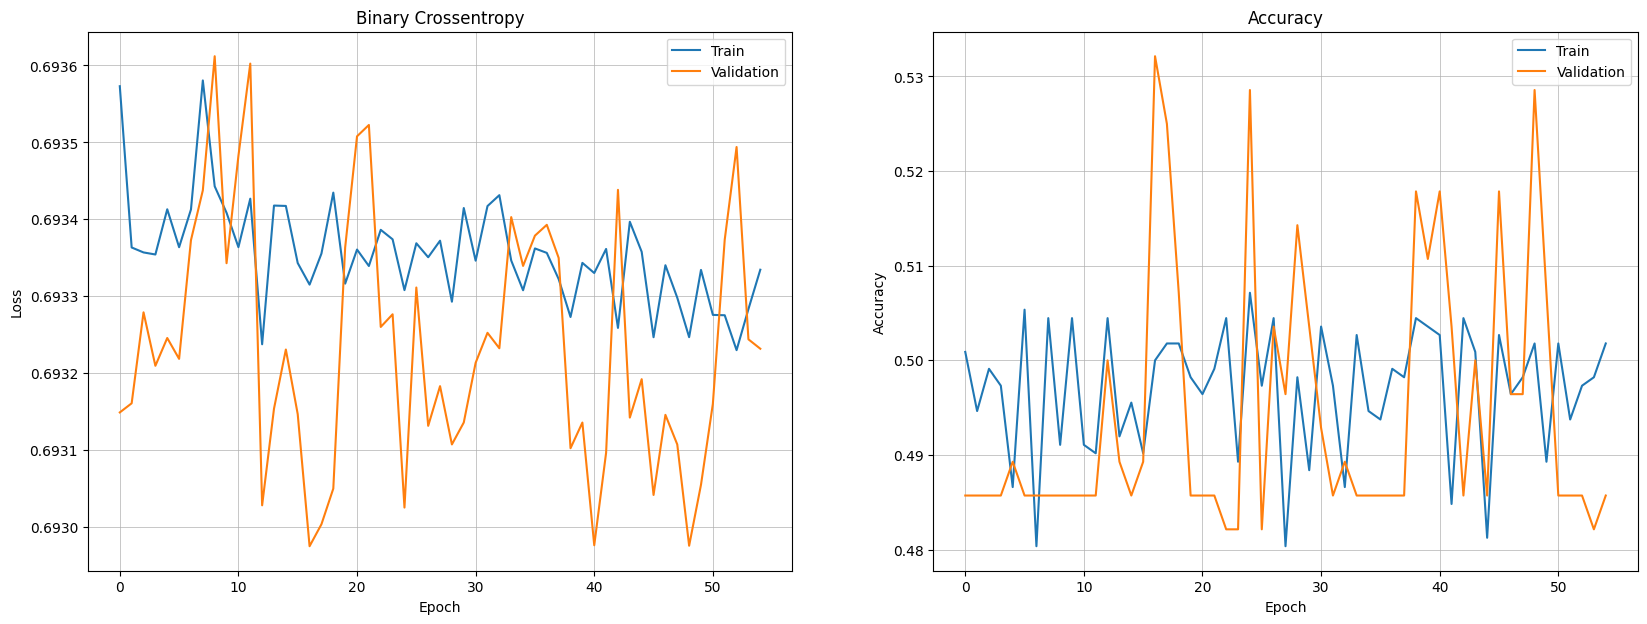

In [239]:
plot_history(history)

In [131]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.4867


[0.6944554448127747, 0.4866666793823242]

## Additive Uniform Noise

## Additive White Gaussian Noise

In [132]:
gw_noise = np.random.normal(loc=0.0, scale=0.05, size=50)
gw_noise

array([ 0.00412838, -0.00811534,  0.07441136,  0.09582761,  0.0301959 ,
       -0.10718047,  0.04082249,  0.08987196,  0.02758695,  0.01120133,
       -0.01640701, -0.07913074,  0.07839341,  0.01857201, -0.00672923,
       -0.0100222 , -0.0796628 ,  0.0021562 , -0.08516032, -0.07409789,
        0.02726005, -0.01843716,  0.02515316,  0.01350185, -0.01038826,
       -0.06717699,  0.02741227, -0.00235935, -0.02580083, -0.01811373,
       -0.08147046, -0.04363618, -0.02483448, -0.00061725,  0.02168372,
       -0.01135126,  0.0669526 , -0.04957309,  0.07812245, -0.04651406,
       -0.03580584,  0.05359309, -0.07874363,  0.04629398, -0.03035535,
        0.09054381, -0.10948718, -0.02878736, -0.00652364,  0.02569695])